In [ ]:
from periomod.base import Patient, Side, Tooth
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pdgrouprevaluation",
    encodings=["target", "one_hot"],
    learners=["xgb", "lr", "rf", "mlp"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo", "rs"],
    criteria=["macro_f1", "brier_score"],
    sampling=[None, "upsampling", "downsampling", "smote"],
    factor=2,
    n_configs=50,
    n_jobs=-1,
    path="/Users/toby/periodontal-modeling/data/processed/processed_data.csv"
)

wrapper.baseline()

In [ ]:
benchmark, learners = wrapper.wrapped_benchmark()
wrapper.save_benchmark(
    benchmark_df=benchmark,
    file_name="pdgrouprevaluation_experiments.csv",
    folder_name="pdgrouprevaluation",
)
wrapper.save_learners(
    learners_dict=learners, folder_name="pdgrouprevaluation_experiments"
)

In [ ]:
from periomod.wrapper import load_benchmark, load_learners

benchmark = load_benchmark(
    path="/Users/toby/periodontal-modeling/reports/pdgrouprevaluation/pdgrouprevaluation_experiments.csv"
    )
learners = load_learners(
    path="/Users/toby/periodontal-modeling/models/pdgrouprevaluation_experiments"
    )

In [3]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="macro_f1",
    aggregate=True,
    path="/Users/toby/periodontal-modeling/data/processed/processed_data.csv"
)

739
Number of unique patients in train set: 591
Number of unique patients in test set: 148
148


In [5]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,pdgrouprevaluation,rf,macro_f1,smote,2.0,0.5645,0.8032,"[0.8954870249613842, 0.39207525053886816, 0.40...",0.1396


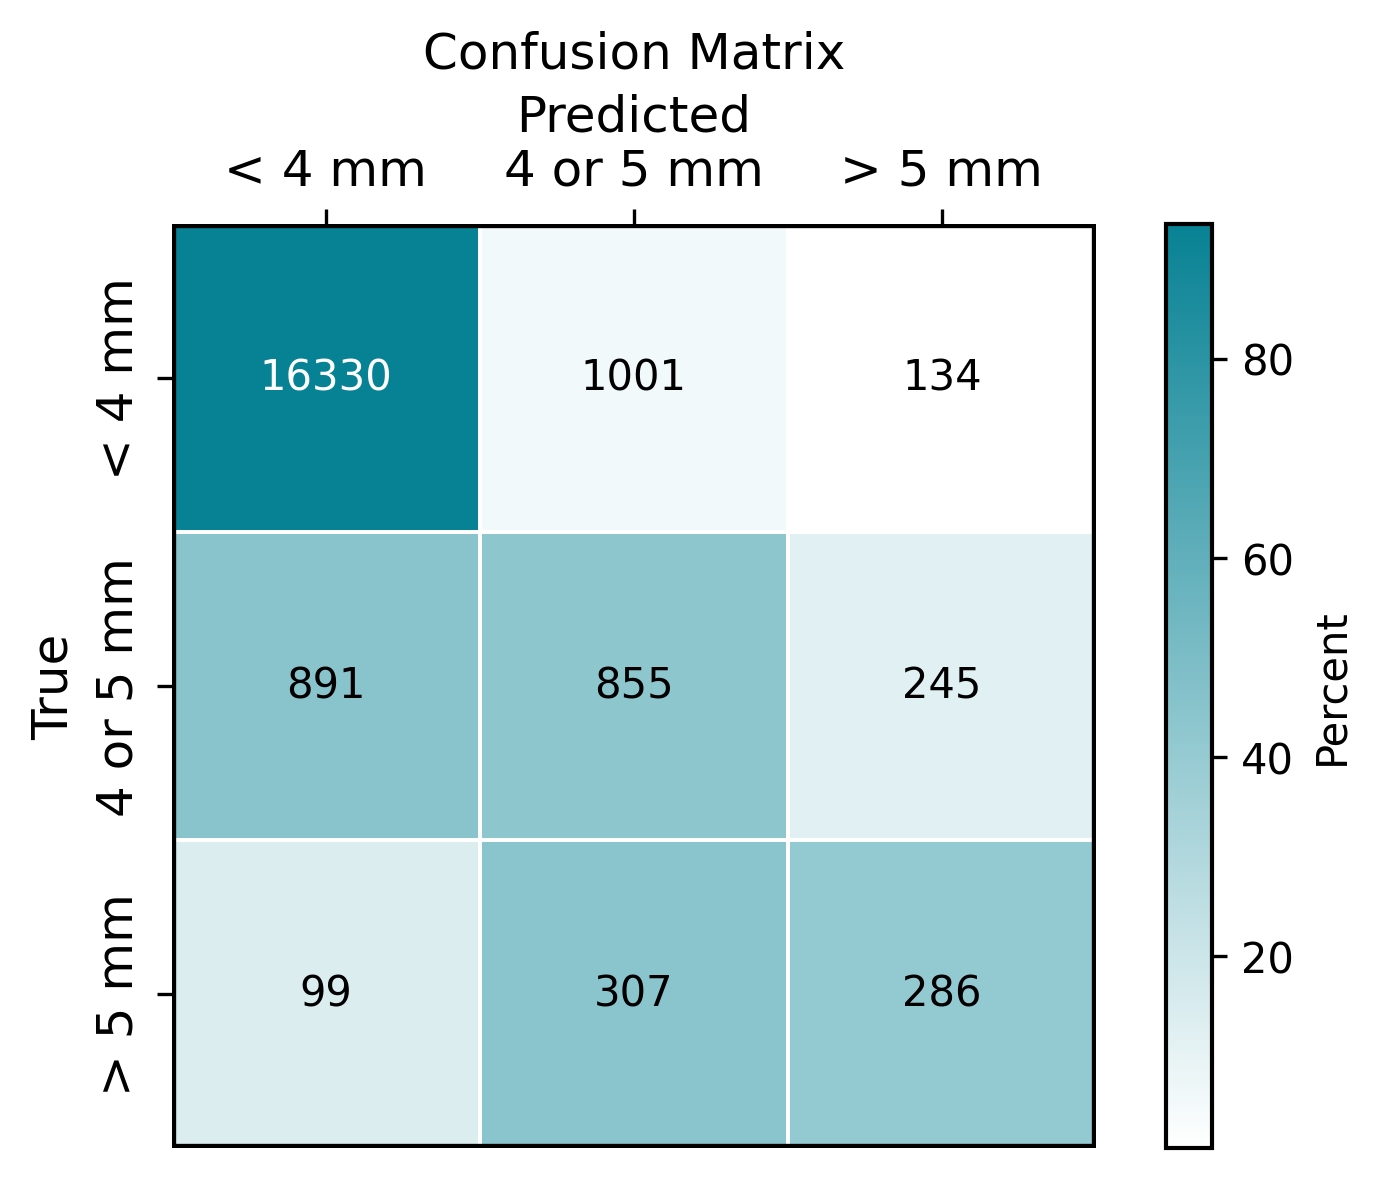

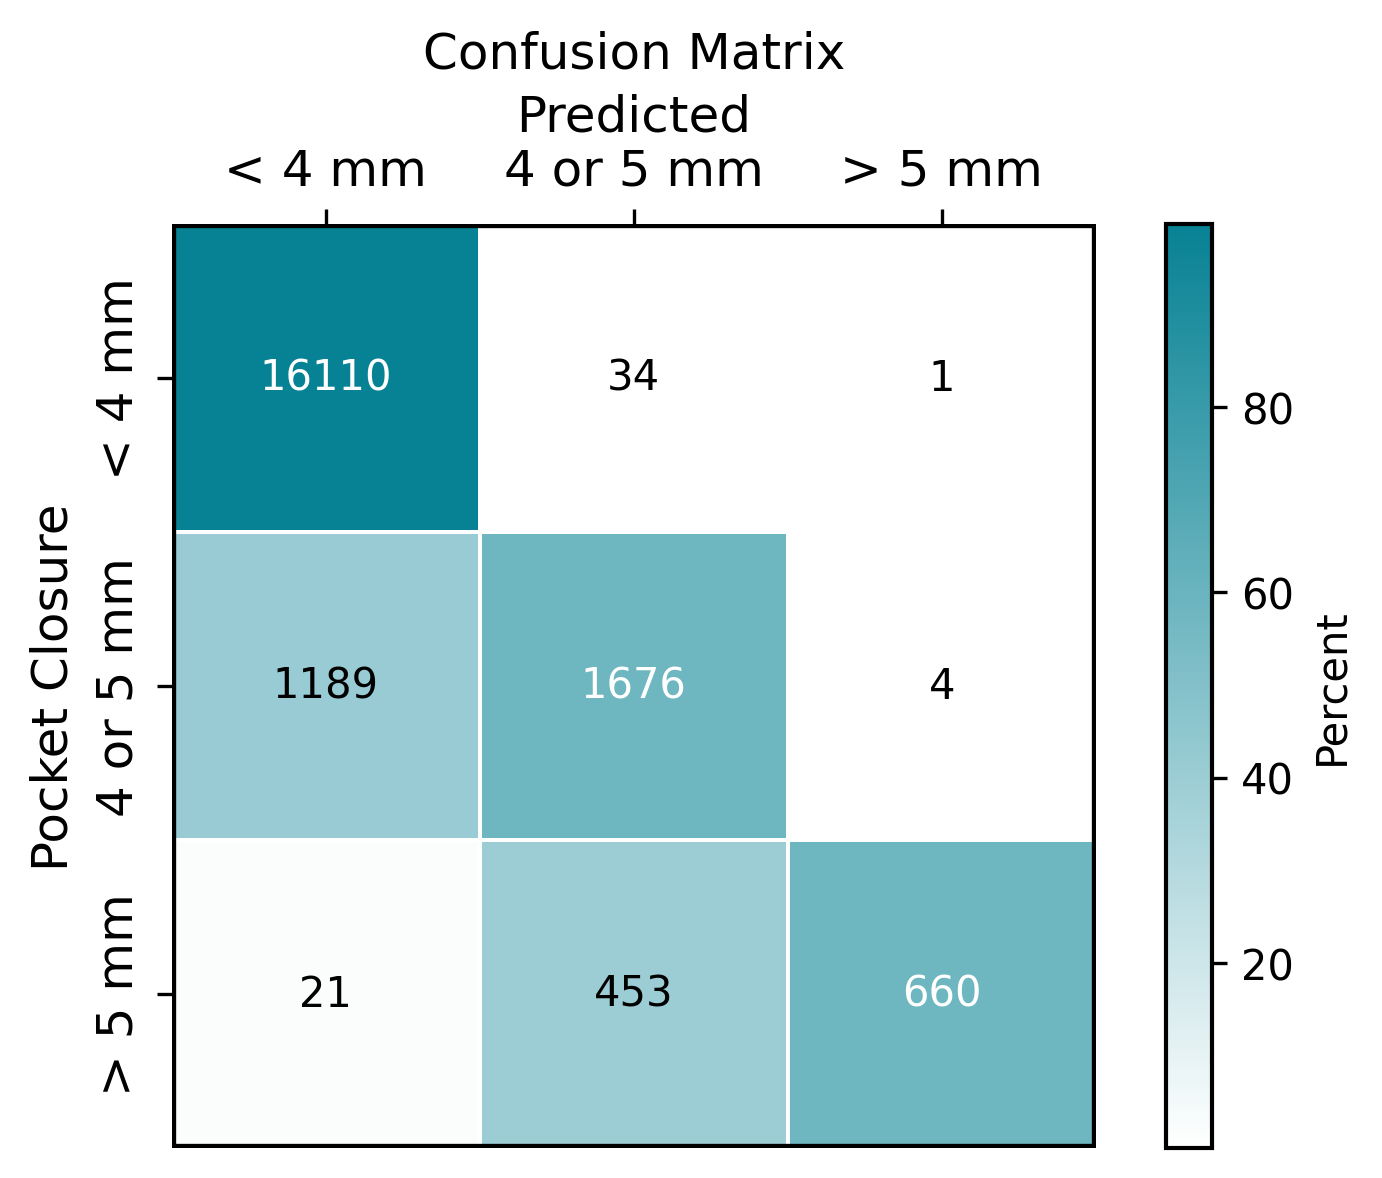

Average and Median Brier Scores by y:
           y      mean    median
0  4 or 5 mm  0.250720  0.200462
1     < 4 mm  0.032554  0.001389
2     > 5 mm  0.243802  0.223392


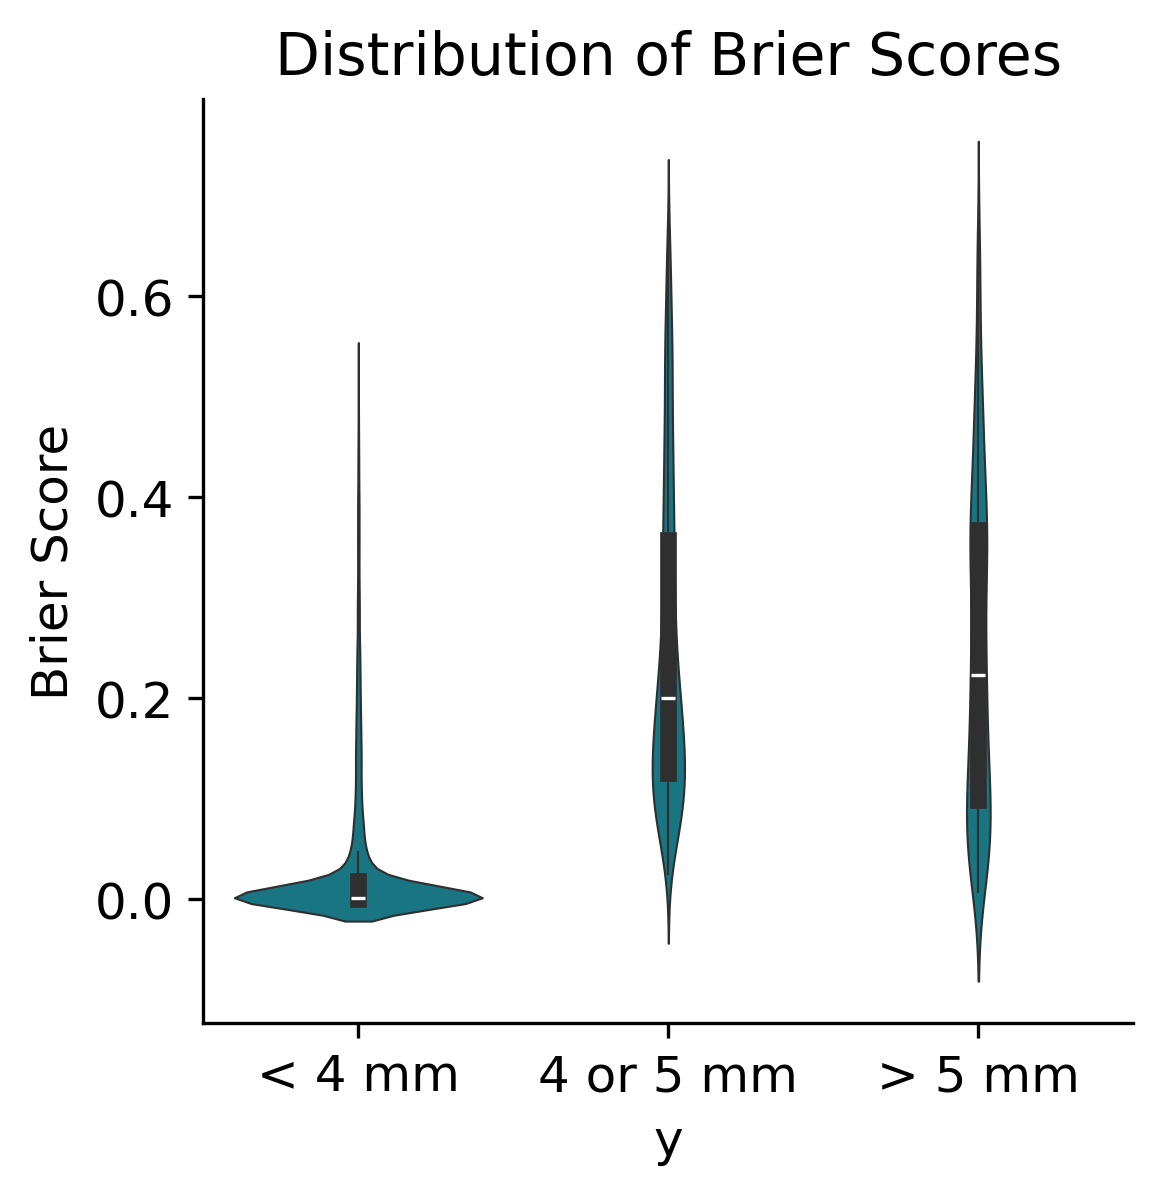

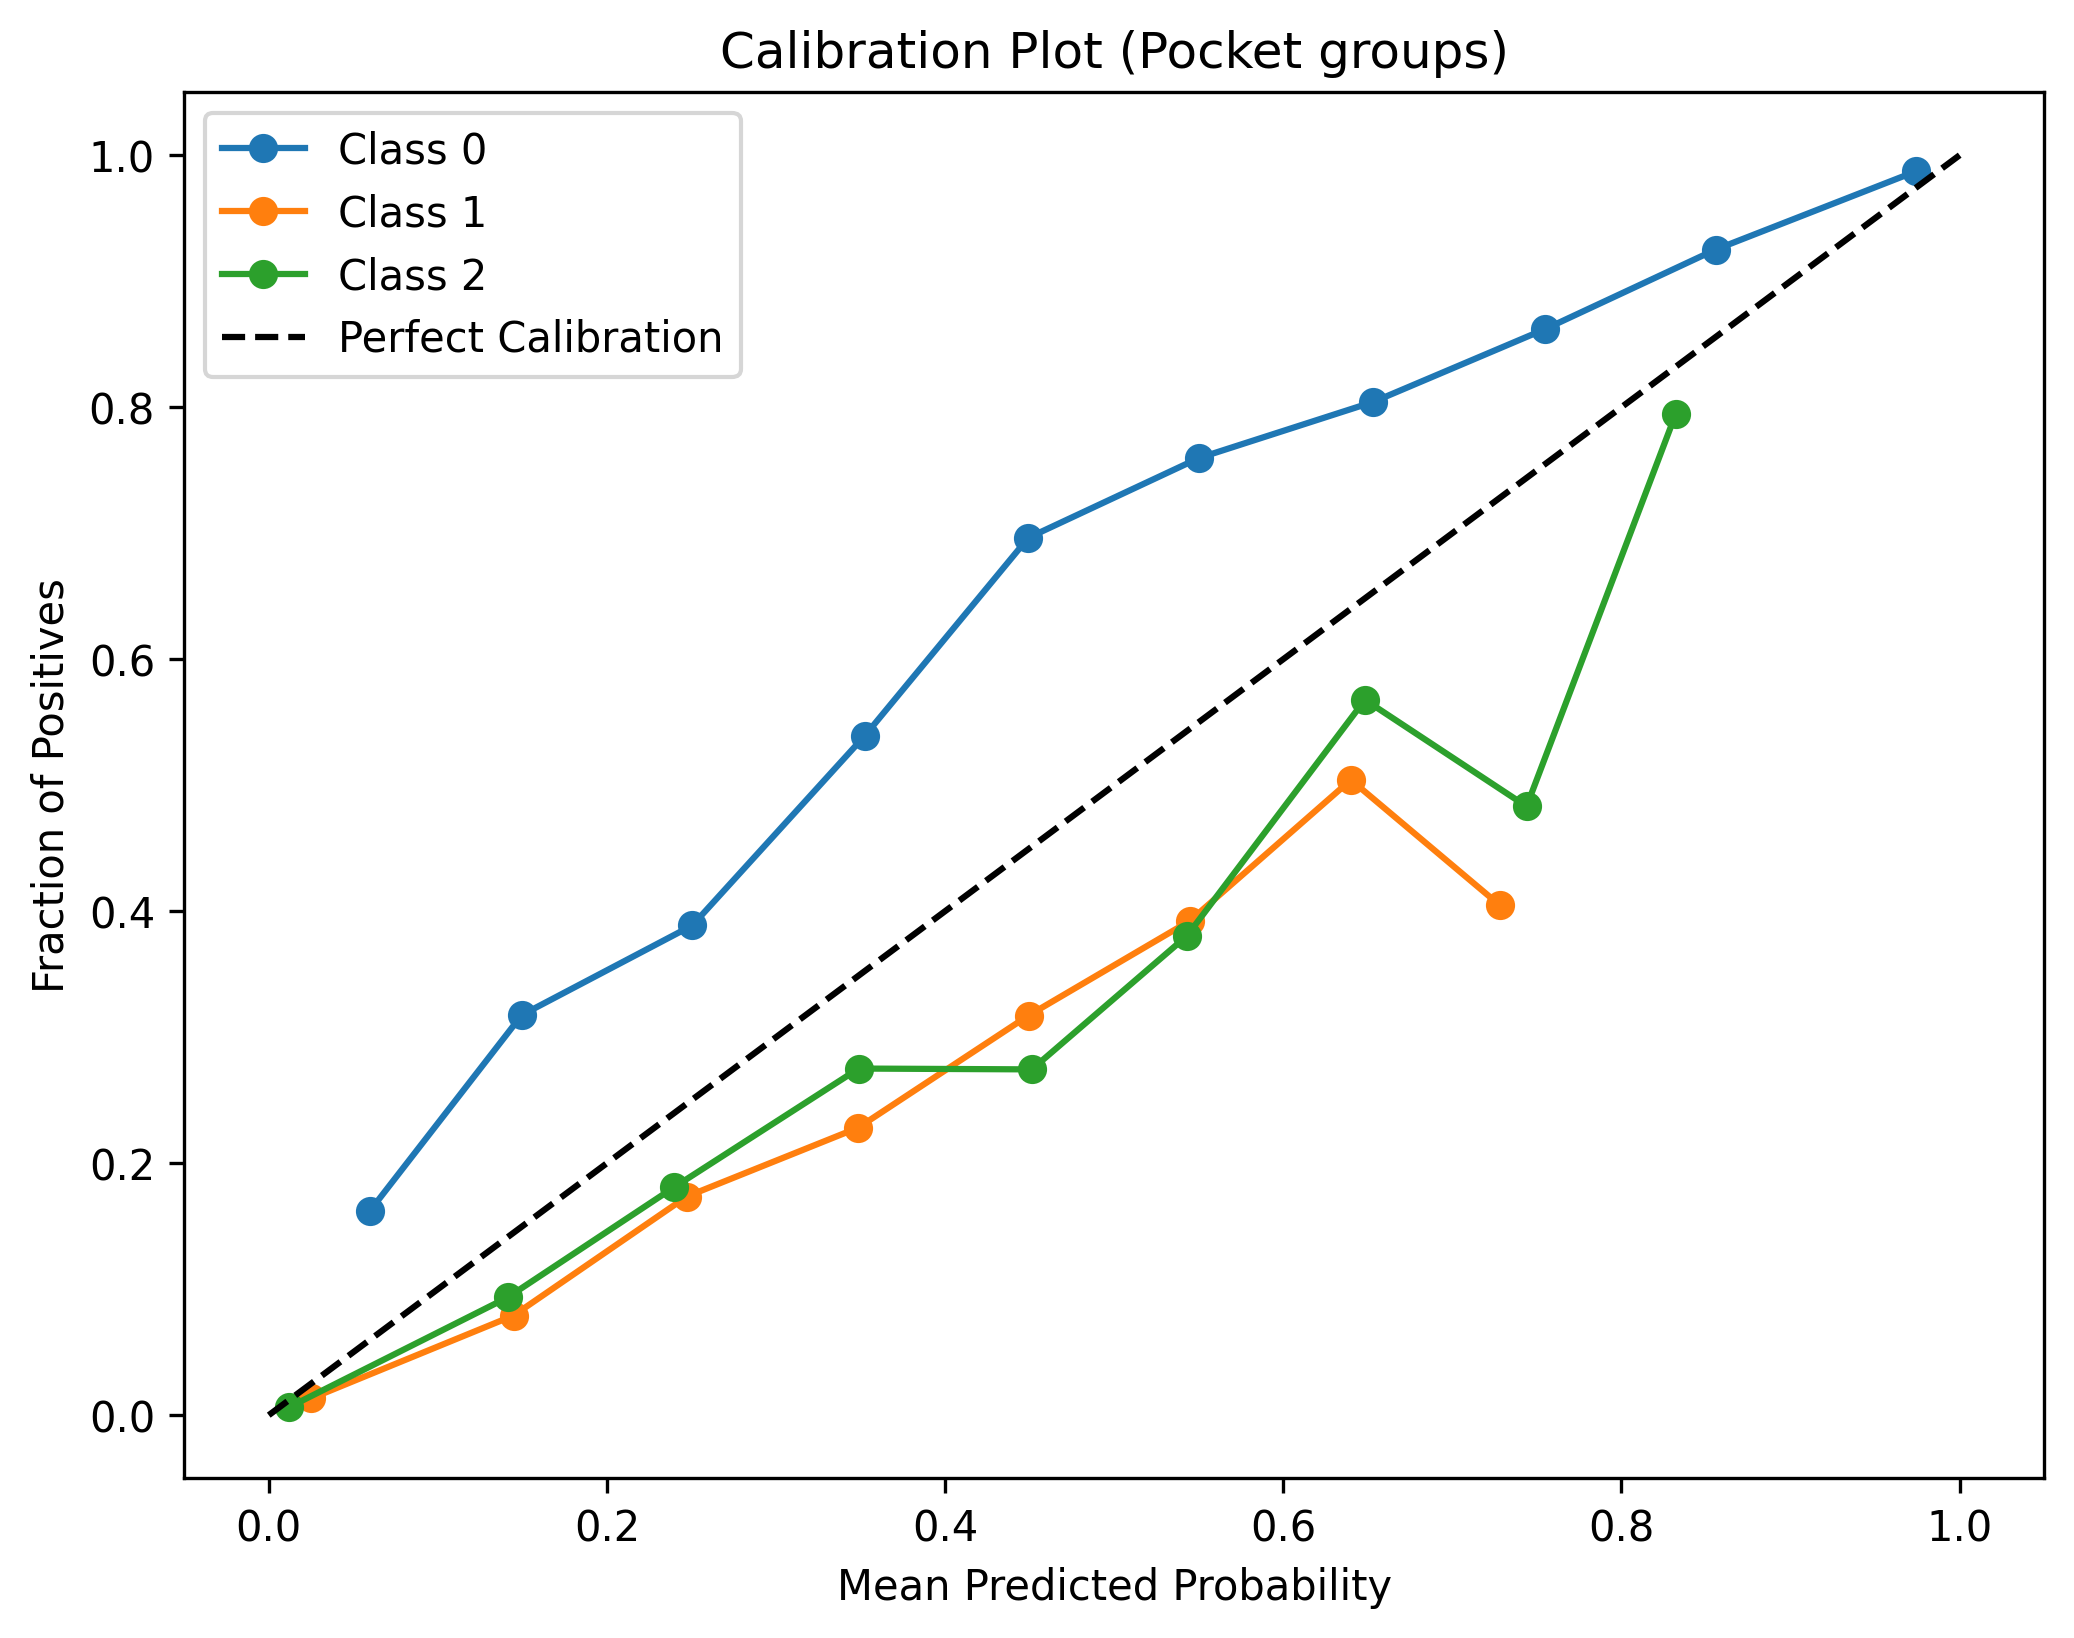

In [4]:
evaluator.wrapped_evaluation()

148


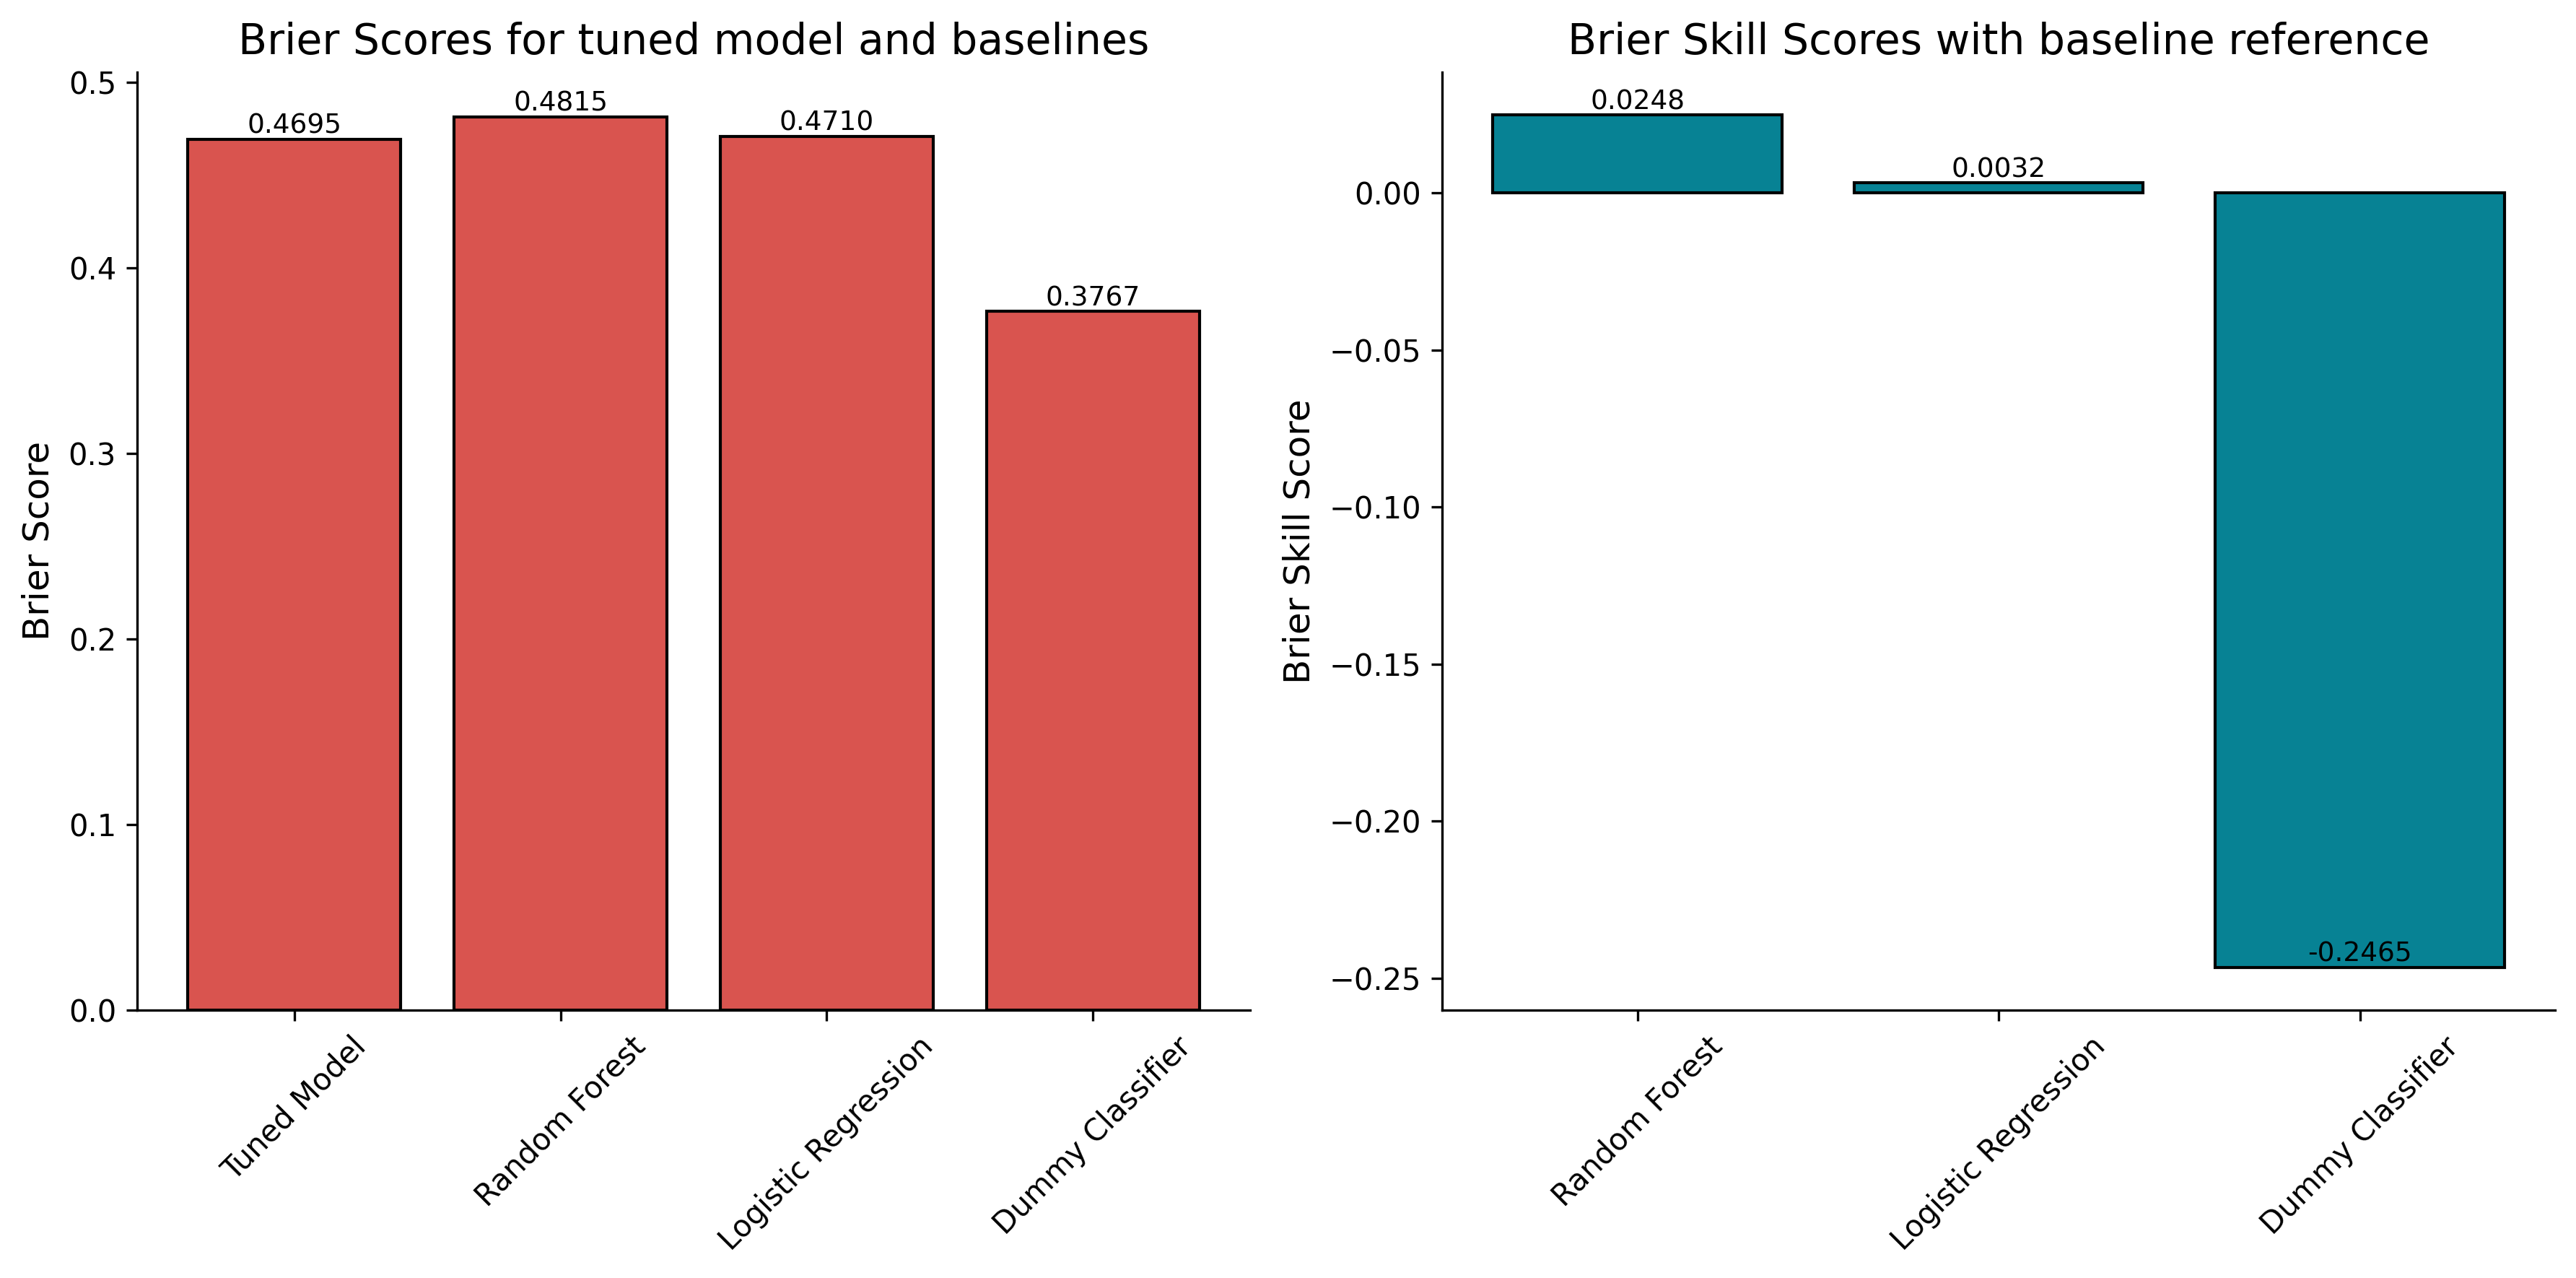

In [ ]:
evaluator.compare_bss(tight_layout=True, true_preds=True, brier_threshold=0.2)

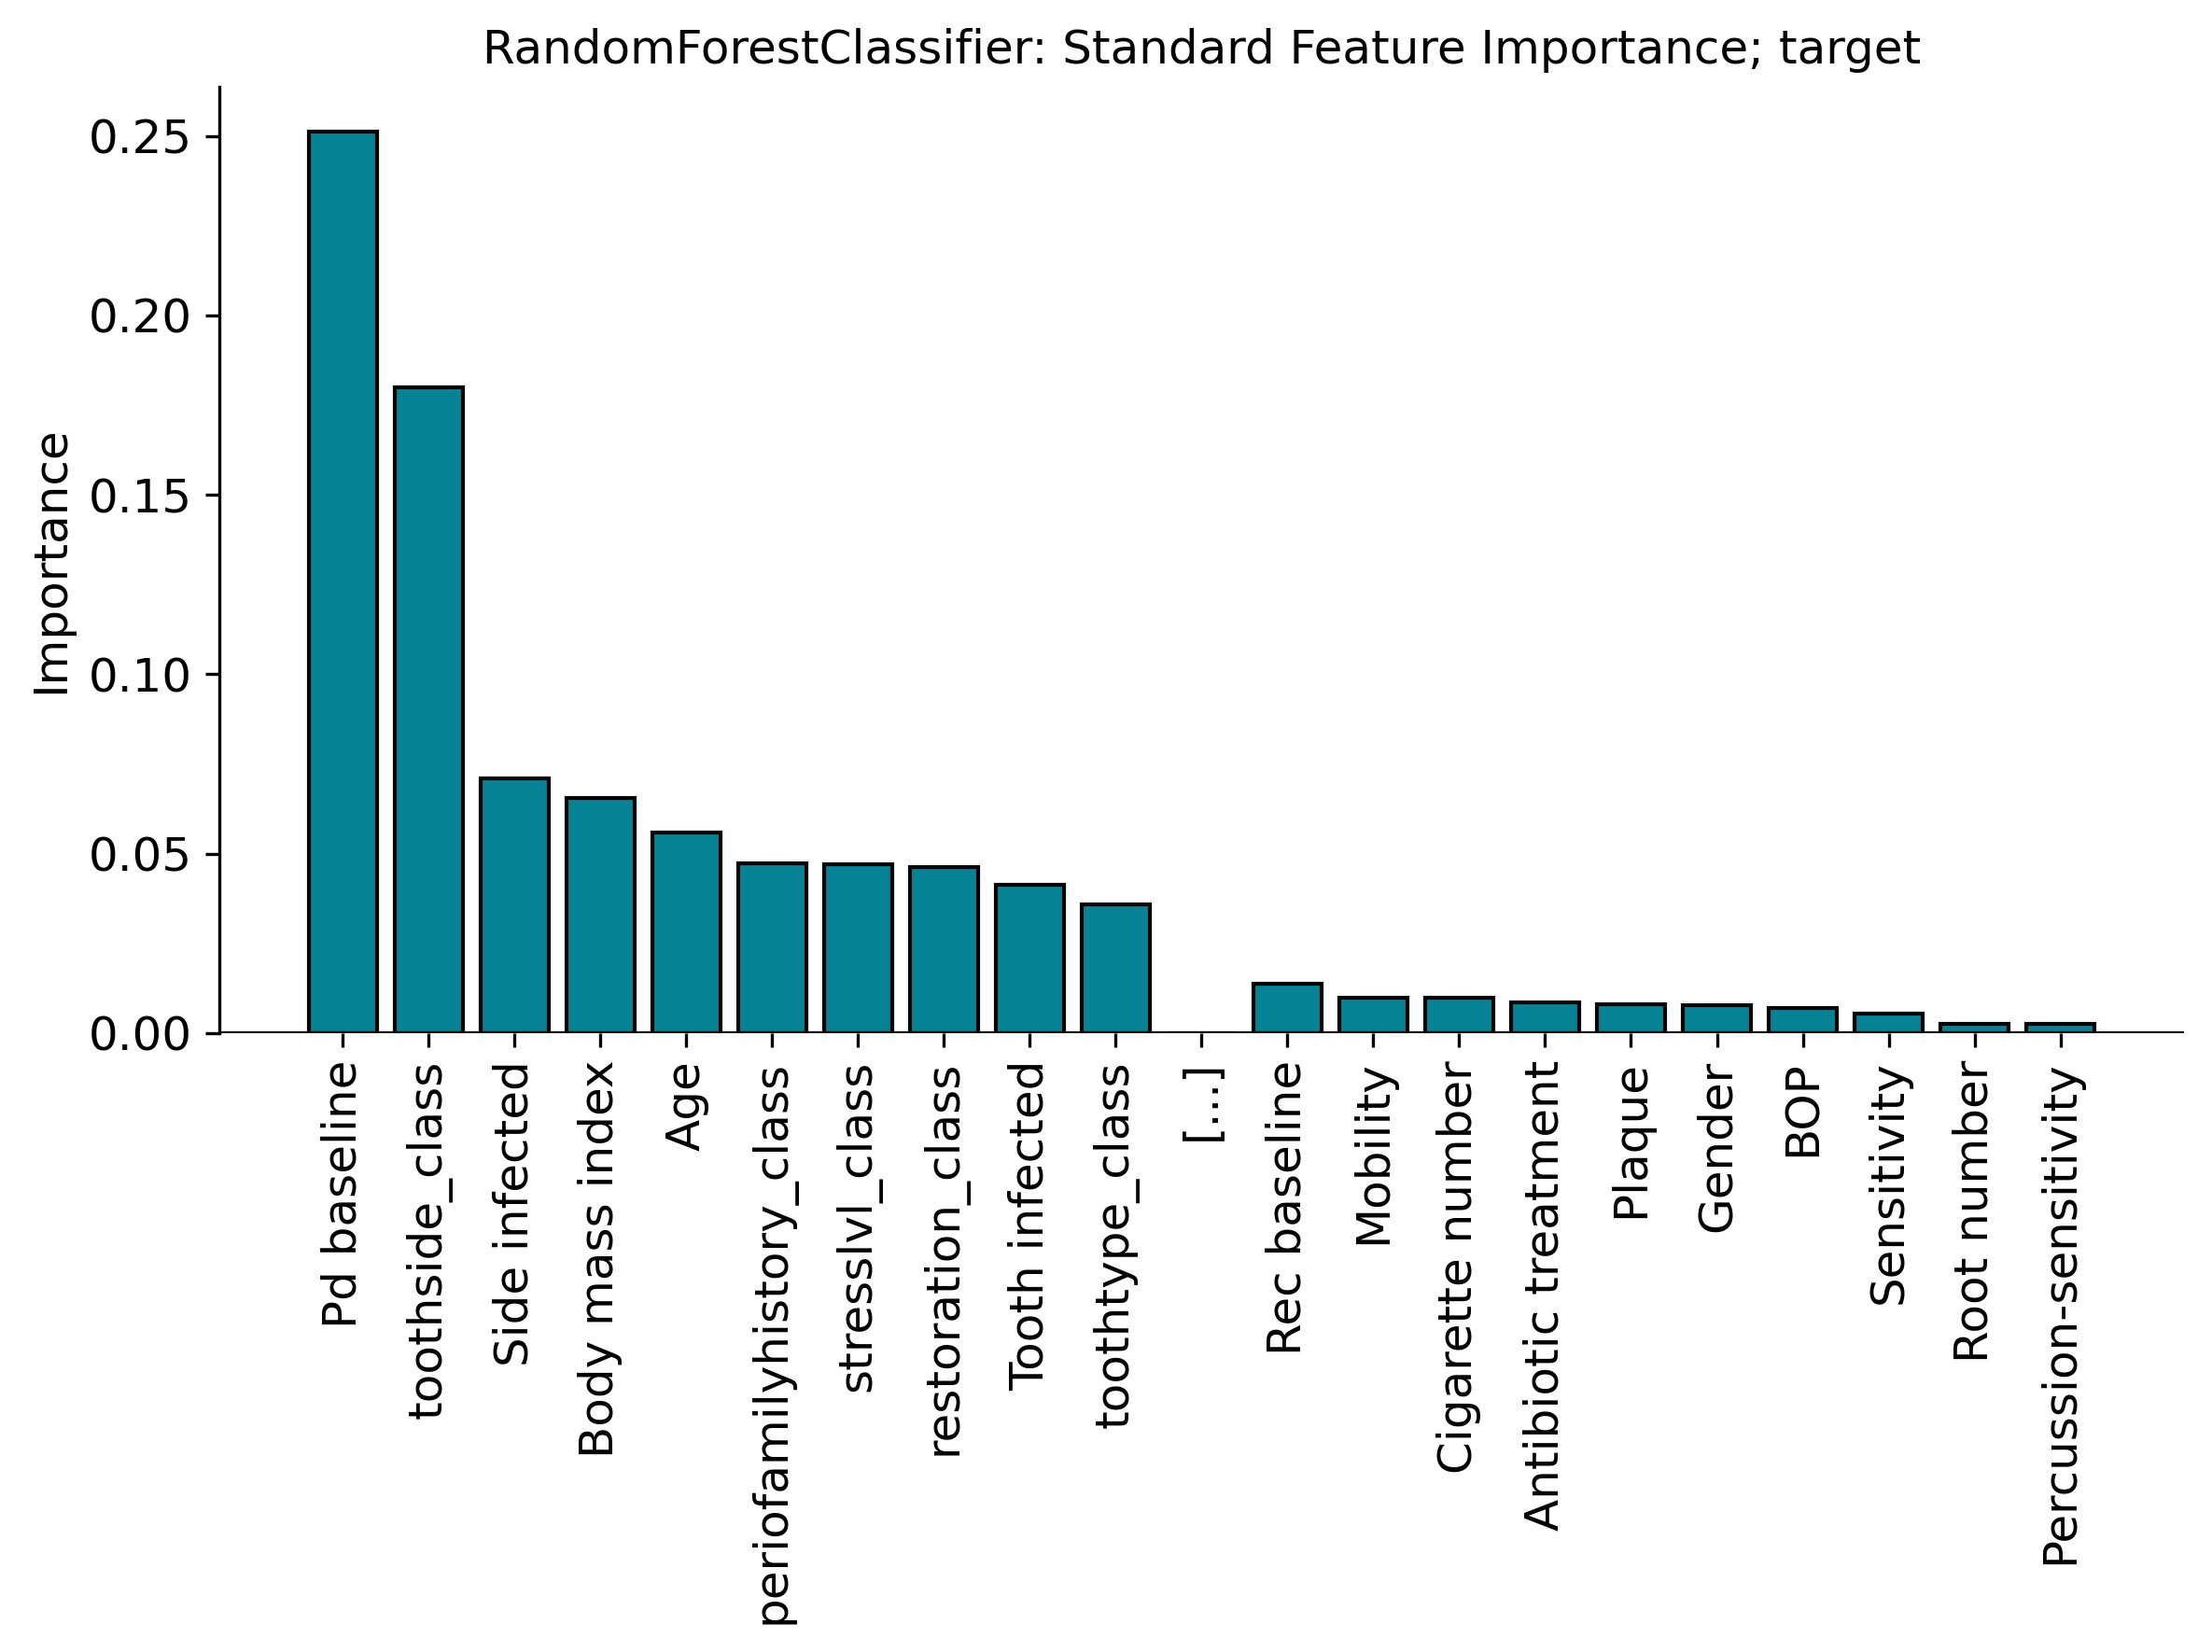

In [5]:
evaluator.evaluate_feature_importance(fi_types=["standard"])

In [8]:
patient = Patient(
    age=45,
    gender=1,
    bodymassindex=23.5,
    periofamilyhistory=1,
    diabetes=0,
    smokingtype=2,
    cigarettenumber=10,
    antibiotictreatment=0,
    stresslvl=2,
    teeth=[
        Tooth(
            tooth=11,
            toothtype=1,
            rootnumber=1,
            mobility=1,
            restoration=0,
            percussion=0,
            sensitivity=1,
            sides=[
                Side(
                    furcationbaseline=1,
                    side=1,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=5,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=6,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
        Tooth(
            tooth=18,
            toothtype=3,
            rootnumber=2,
            mobility=0,
            restoration=1,
            percussion=1,
            sensitivity=0,
            sides=[
                Side(
                    furcationbaseline=3,
                    side=1,
                    pdbaseline=4,
                    recbaseline=5,
                    plaque=2,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=5,
                    pdbaseline=5,
                    recbaseline=5,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=3,
                    side=6,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
    ],
)

_, output, results = evaluator.wrapped_patient_inference(patient)  # noqa: E501
output  # noqa: E501

,tooth,side,prediction,probability
0,11,1,0,0.977159
1,11,2,0,0.996926
2,11,3,0,0.982596
3,11,4,0,0.516401
4,11,5,0,0.992797
5,11,6,0,0.978367
6,18,1,1,0.726115
7,18,2,0,0.967754
8,18,3,0,0.921422
9,18,4,1,0.674066


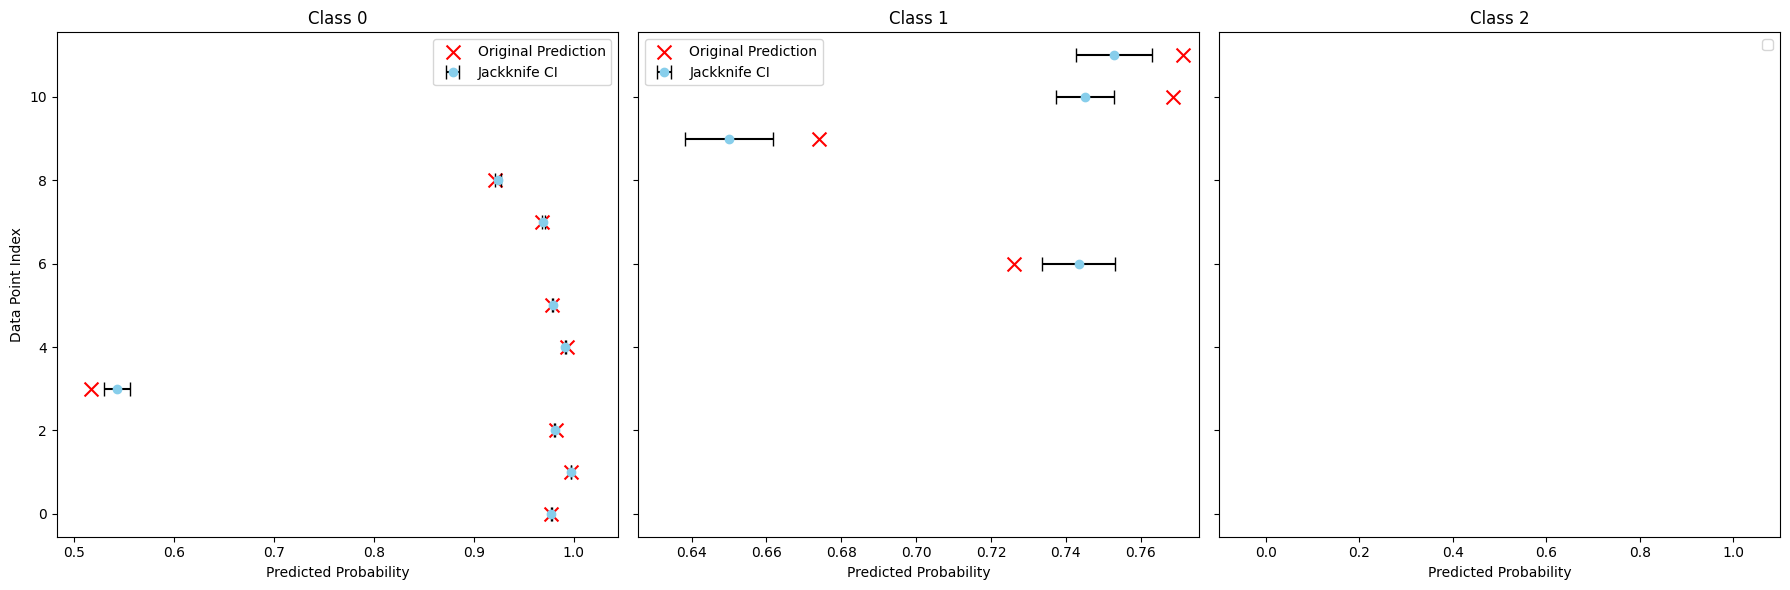

In [9]:
_, ci_plot = evaluator.wrapped_jackknife(patient, results, sample_fraction=0.1)